## Date - 25/10/2023
## Team ID - 1025
## Project Title - *Building a Smarter AI-Powered Spam Classifier*

#Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from datetime import datetime



#Loading Dataset

In [2]:
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam.csv


In [3]:
dataset = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')


# Data Exploration

In [4]:
dataset


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
dataset.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
len(dataset)

5572

In [8]:
# Check for null values
dataset.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
# Check the number of coloumns
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
# Check for number of unique values
dataset.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

In [11]:
# Checking for balancement
dataset['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [12]:
# Dropping unnamed columns
dataset = dataset[['v1', 'v2']]

dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['v1'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['v2'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_2, *['v1', 'v2'], **{})
chart

## Pre-Processing and Visualisation of Data

<Axes: xlabel='v1', ylabel='Count'>

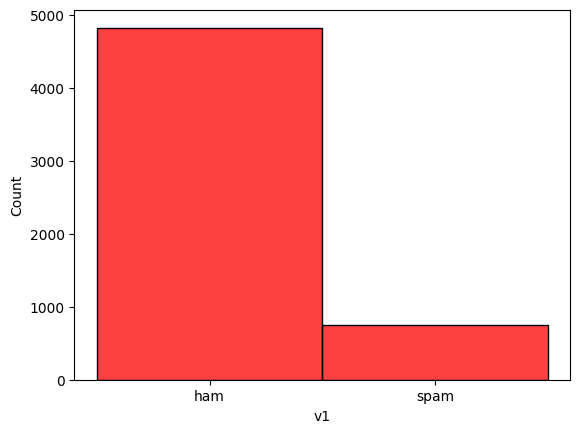

In [13]:
sns.histplot(dataset, x='v1', bins=50, color='red')

<Axes: xlabel='v1', ylabel='count'>

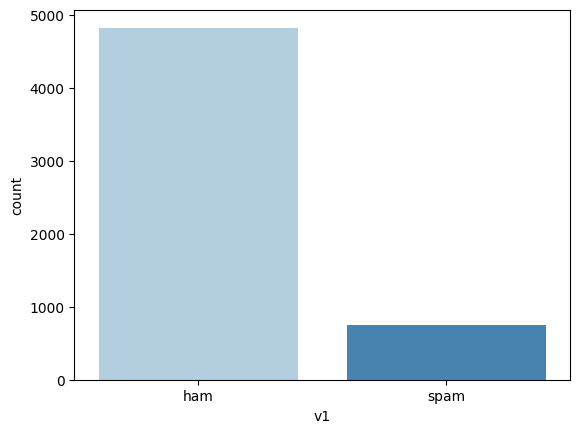

In [14]:
# Use a countplot for categorical data
sns.countplot(data=dataset, x='v1', palette='Blues')


<Axes: xlabel='v2', ylabel='Count'>

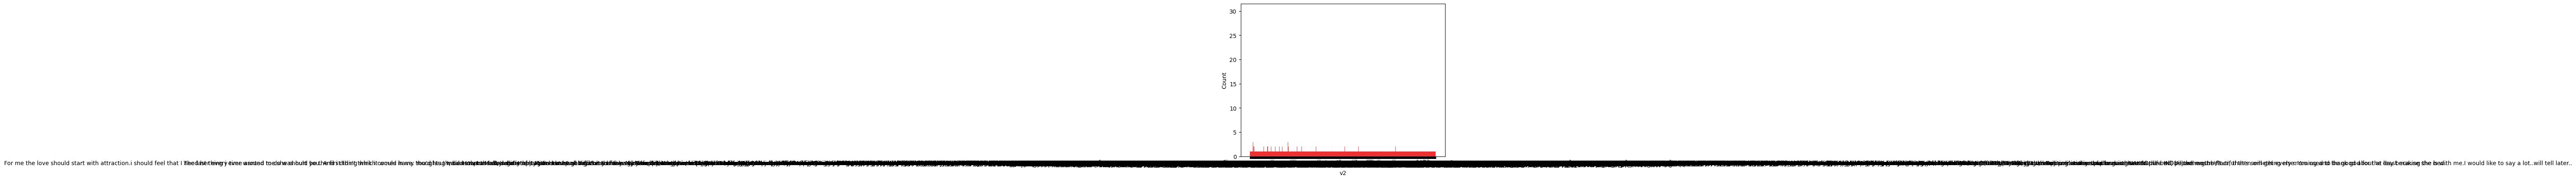

In [15]:
sns.histplot(dataset, x='v2', bins=50, color='red')

<Axes: xlabel='v2', ylabel='count'>

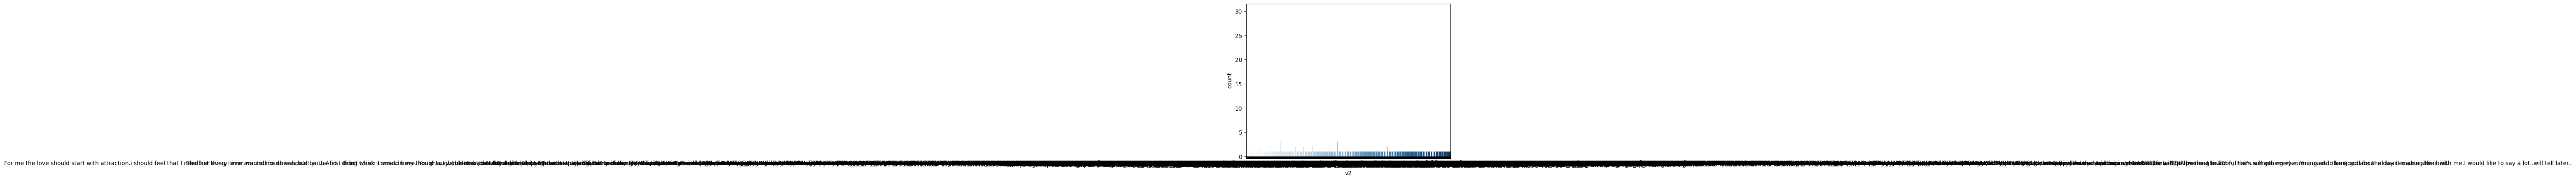

In [ ]:
# Use a countplot for categorical data
sns.countplot(data=dataset, x='v2', palette='Blues')


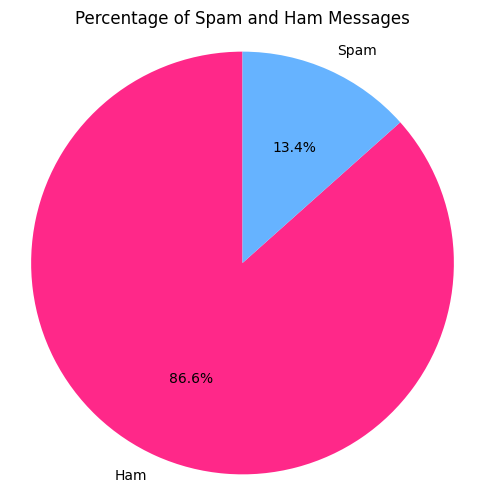

In [16]:
# Count the number of spam and ham messages in v1
spam_count = dataset['v1'].value_counts()[1]
ham_count = dataset['v1'].value_counts()[0]
plt.figure(figsize=(6, 6))
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ff2889', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')
plt.show()


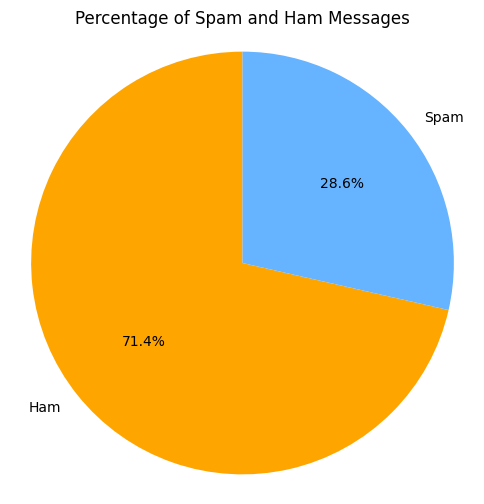

In [17]:
# Count the number of spam and ham messages in v2
spam_count = dataset['v2'].value_counts()[1]
ham_count = dataset['v2'].value_counts()[0]

plt.figure(figsize=(6, 6))
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ffa500', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')
plt.show()



In [18]:
X_text = dataset['v2']

y = dataset['v2']

# Split the data into training and testing sets
X_text_train, X_text_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# TfidfVectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train)
X_test_tfidf = tfidf_vectorizer.transform(X_text_test)


# Create a classification model
clf = DecisionTreeClassifier()

clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 0.10


## Modeling

In [19]:


def create_rnn_model(units, dropout_rate):
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=100, input_length=max_len))
    model.add(SimpleRNN(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_lstm_model(units, dropout_rate):
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=100, input_length=max_len))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_gru_model(units, dropout_rate):
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=100, input_length=max_len))
    model.add(GRU(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [20]:
# Define hyperparameters
units = 64
dropout_rate = 0.5

## Compiling the Models

In [21]:
from tensorflow.keras.models import Sequential
# Define the vocabulary size
num_words = 10000
max_len = 100
# Create and compile the models

# RNN
rnn_model = create_rnn_model(units, dropout_rate)
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# LSTM
lstm_model = create_lstm_model(units, dropout_rate)
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# GRU
gru_model = create_gru_model(units, dropout_rate)
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Train the models with early stopping
early_stopping = EarlyStopping(patience=2, restore_best_weights=True)

## Saving the Models

In [23]:


def save_model(model, prefix=''):
    current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    filename = f"{prefix}model_{current_datetime}.h5"

    model.save(filename)
    print(f"Model saved to {filename}")

# Saving the models
save_model(rnn_model, prefix='rnn')
save_model(lstm_model, prefix='lstm')
save_model(gru_model, prefix='gru')



Model saved to rnnmodel_2023-10-25_09-05-48.h5
Model saved to lstmmodel_2023-10-25_09-05-48.h5
Model saved to grumodel_2023-10-25_09-05-48.h5
